In [13]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm



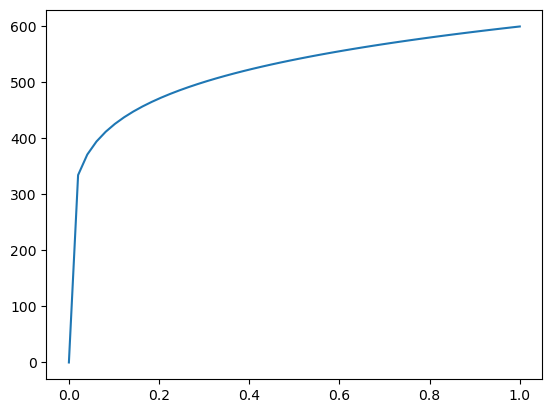

In [7]:
def compute_stress(K, n, x):
    return K * x ** n

K = 600
n = 0.15
x = np.linspace(0, 1, 50)
y = compute_stress(K, n, x)

plt.plot(x, y)

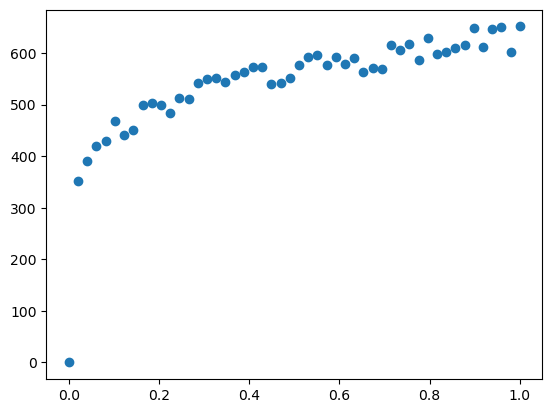

In [8]:
def generate_experimental_noisy_points(K, n, x):
    target = K * x ** n
    noise = 0.1 * np.random.random(50) * target
    return target + noise

K = 600
n = 0.15
x = np.linspace(0, 1, 50)
y_exp = generate_experimental_noisy_points(K, n, x)

plt.scatter(x, y_exp)

In [9]:
def mean_square_error(y, y_exp):
    return np.sum(np.abs(y - y_exp))

mean_square_error(y, y_exp)

1400.4278063494817

In [10]:
def scale_parameters(K, n):
    # return scaled parameters between [0, 1] for gradient convergence optimization
    K_scale = ( K - 0 ) / ( 2000 - 0 )
    n_scale = ( n - 0.01 ) / ( 0.5 - 0.01 )
    return K_scale, n_scale

scale_parameters(600, 0.15)

def unscale_parameters(K_scale, n_scale):
    # return unscaled parameters between [min, max] for computing stress
    K = K_scale * ( 2000 - 0 ) + 0
    n = n_scale * ( 0.5 - 0.01 ) + 0.01
    return K, n
    
unscale_parameters(0.3, 0.2857142857142857)



(600.0, 0.15)

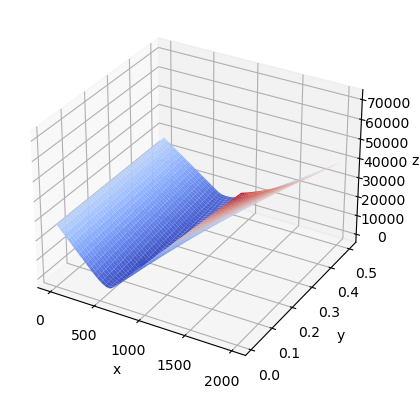

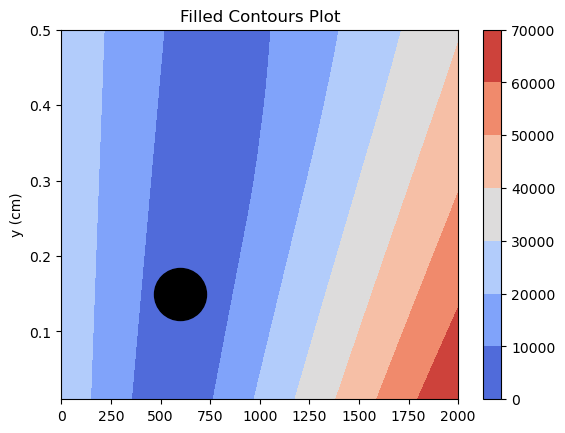

In [24]:
def plot_loss_function():
    K = np.linspace(0, 2000, 100)
    n = np.linspace(0.01, 0.5, 100)

    X, Y = np.meshgrid(K, n)
    zs = np.array(
        [mean_square_error(compute_stress(Ki, ni, x), y_exp) for Ki, ni in zip(np.ravel(X), np.ravel(Y))]
    )
    Z = zs.reshape(X.shape)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
    ax.scatter(600, 0.15, mean_square_error(compute_stress(600, 0.15, x), y_exp))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    fig2,ax2=plt.subplots(1,1)
    cp = ax2.contourf(X, Y, Z, cmap=cm.coolwarm)
    ax2.scatter(600, 0.15, mean_square_error(compute_stress(600, 0.15, x), y_exp), color='black')
    fig2.colorbar(cp) # Add a colorbar to a plot
    ax2.set_title('Filled Contours Plot')
    #ax.set_xlabel('x (cm)')
    ax2.set_ylabel('y (cm)')
    
    plt.show()


plot_loss_function()